### Techniques for pre-processing:

* ADNI (http://adni.loni.usc.edu/methods/pet-analysis-method/pet-analysis/)
    * Four different stages of pre-processing:
        1. 6 raw images per PET session (co-registered)
        1. Average of co-registered data -> 1 image
        1. Stage 2 + Standardizes the size of image and voxels (re-orients image)
        1. Stage 3 + Uniform resolution


* SPM12 (https://www.fil.ion.ucl.ac.uk/spm/)
    * MATLAB script "batch_normalize.m"

### Using SPM:
Running "batch_normalize.m" will pre-process all .nii files in the folder '/SPM/spm_indir' (recursively), and output the result to the folder '/SPM/spm_outdir' (will not copy structure of spm_indir). The pre-processed file will share name with the original file, but start with 'iw'.

---

In [11]:
import dataloader
import display
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [99]:
data_dir = 'data/'

adni_dir = 'ADNI/'
spm_dir = 'SPM/'

original_dir = 'original/'
dynamic_dir = 'dynamic/'
pre_process_1_dir = 'pre_process_1/'
pre_process_2_dir = 'pre_process_2/'
pre_process_3_dir = 'pre_process_3/'

# ADNI pre-processing

In [113]:
subject = '002_S_4225'
slice = 33

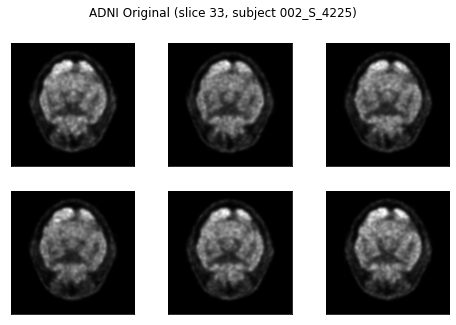

In [115]:
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
fig.suptitle('ADNI Original (slice ' + str(slice) + ', subject ' + subject + ')')
for i in range(1, 7):
    image = dataloader.load_adni_file(data_dir + adni_dir + original_dir + 'ADNI_' + subject + '_Original_' + str(i) + '.nii')
    axs[int((i-1) / 3), (i-1) % 3].imshow(image[slice, :, :], cmap = 'gray')
    axs[int((i-1) / 3), (i-1) % 3].set_xticks([])
    axs[int((i-1) / 3), (i-1) % 3].set_yticks([])
number_of_slices = image.shape[0]

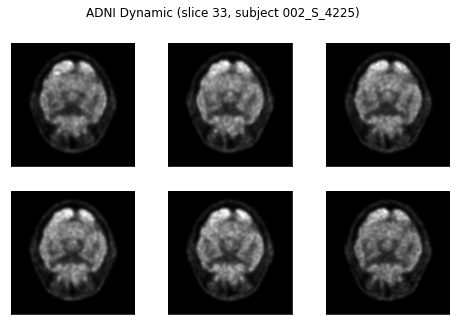

In [92]:
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
fig.suptitle('ADNI Dynamic (slice ' + str(slice) + ', subject ' + subject + ')')
for i in range(1, 7):
    image = dataloader.load_adni_file(data_dir + adni_dir + dynamic_dir + 'ADNI_' + subject + '_Dynamic_' + str(i) + '.nii')
    axs[int((i-1) / 3), (i-1) % 3].imshow(image[slice, :, :], cmap = 'gray')
    axs[int((i-1) / 3), (i-1) % 3].set_xticks([])
    axs[int((i-1) / 3), (i-1) % 3].set_yticks([])

(90, 128, 128)


Text(0.5, 1.0, 'ADNI Averaged (slice 33, subject 002_S_4225)')

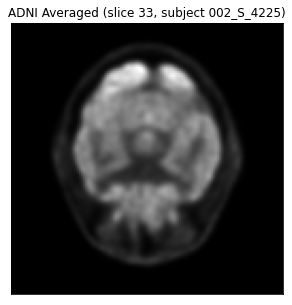

In [102]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_adni_file(data_dir + adni_dir + pre_process_1_dir + 'ADNI_' + subject + '_PreProcess_1.nii')
ax.imshow(image[slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('ADNI Averaged (slice ' + str(slice) + ', subject ' + subject + ')')

Text(0.5, 1.0, 'ADNI AC-PC (slice 33, subject 002_S_4225)')

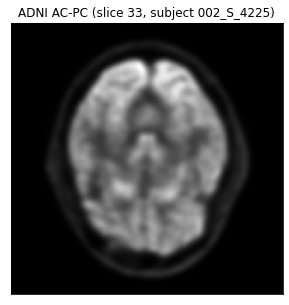

In [127]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_adni_file(data_dir + adni_dir + pre_process_2_dir + 'ADNI_' + subject + '_PreProcess_2.nii')

# No longer a one-to-one correspondence of slices
temp_slice = int((slice / number_of_slices) * image.shape[0])

ax.imshow(image[temp_slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('ADNI AC-PC (slice ' + str(slice) + ', subject ' + subject + ')')

Text(0.5, 1.0, 'ADNI Resolution (slice 33, subject 002_S_4225)')

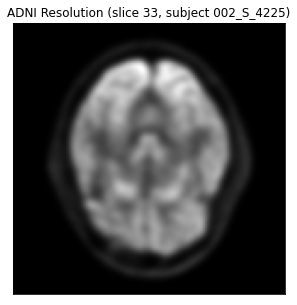

In [126]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_adni_file(data_dir + adni_dir + pre_process_3_dir + 'ADNI_' + subject + '_PreProcess_3.nii')

# No longer a one-to-one correspondence of slices
temp_slice = int((slice / number_of_slices) * image.shape[0])

ax.imshow(image[temp_slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('ADNI Resolution (slice ' + str(slice) + ', subject ' + subject + ')')

# SPM pre-processing

SPM can be done at any level of ADNI pre-processing

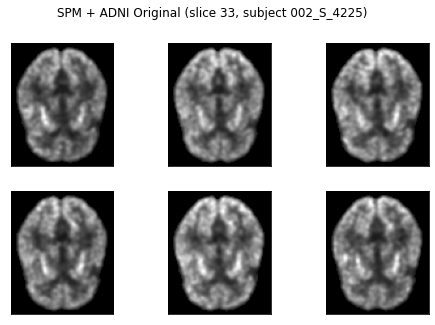

In [136]:
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
fig.suptitle('SPM + ADNI Original (slice ' + str(slice) + ', subject ' + subject + ')')
for i in range(1, 7):
    image = dataloader.load_spm_file(data_dir + spm_dir + original_dir + 'iwADNI_' + subject + '_Original_' + str(i) + '.nii')

    # No longer a one-to-one correspondence of slices
    temp_slice = int((slice / number_of_slices) * image.shape[0])
    
    axs[int((i-1) / 3), (i-1) % 3].imshow(image[temp_slice, :, :], cmap = 'gray')
    axs[int((i-1) / 3), (i-1) % 3].set_xticks([])
    axs[int((i-1) / 3), (i-1) % 3].set_yticks([])
number_of_slices = image.shape[0]

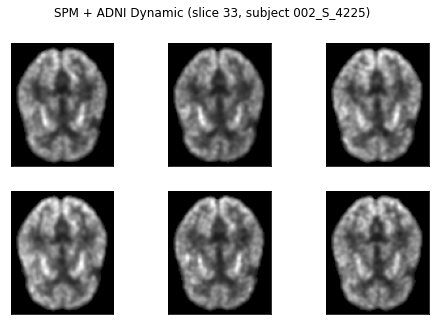

In [137]:
fig, axs = plt.subplots(2, 3, figsize = (8, 5))
fig.suptitle('SPM + ADNI Dynamic (slice ' + str(slice) + ', subject ' + subject + ')')
for i in range(1, 7):
    image = dataloader.load_spm_file(data_dir + spm_dir + dynamic_dir + 'iwADNI_' + subject + '_Dynamic_' + str(i) + '.nii')

    # No longer a one-to-one correspondence of slices
    temp_slice = int((slice / number_of_slices) * image.shape[0])
    
    axs[int((i-1) / 3), (i-1) % 3].imshow(image[temp_slice, :, :], cmap = 'gray')
    axs[int((i-1) / 3), (i-1) % 3].set_xticks([])
    axs[int((i-1) / 3), (i-1) % 3].set_yticks([])
number_of_slices = image.shape[0]

Text(0.5, 1.0, 'SPM + ADNI Averaged (slice 33, subject 002_S_4225)')

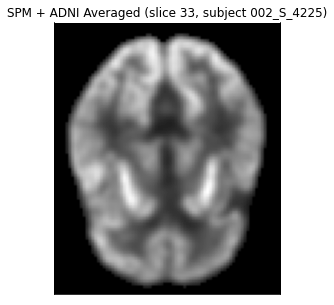

In [139]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_spm_file(data_dir + spm_dir + pre_process_1_dir + 'iwADNI_' + subject + '_PreProcess_1.nii')
ax.imshow(image[slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('SPM + ADNI Averaged (slice ' + str(slice) + ', subject ' + subject + ')')

Text(0.5, 1.0, 'SPM + ADNI AC-PC (slice 33, subject 002_S_4225)')

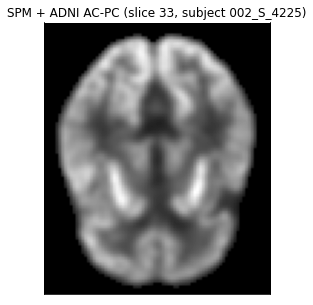

In [145]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_spm_file(data_dir + spm_dir + pre_process_2_dir + 'iwADNI_' + subject + '_PreProcess_2.nii')
ax.imshow(image[slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('SPM + ADNI AC-PC (slice ' + str(slice) + ', subject ' + subject + ')')

Text(0.5, 1.0, 'SPM + ADNI Resolution (slice 33, subject 002_S_4225)')

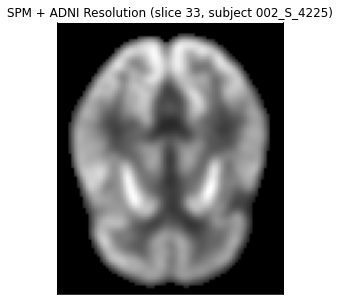

In [144]:
fig, ax = plt.subplots(figsize = (8, 5))
image = dataloader.load_spm_file(data_dir + spm_dir + pre_process_3_dir + 'iwADNI_' + subject + '_PreProcess_3.nii')
ax.imshow(image[slice, :, :], cmap = 'gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('SPM + ADNI Resolution (slice ' + str(slice) + ', subject ' + subject + ')')